# Used Car Pricing Analysis
This analysis will provide prediction of used car prices by evaluating which factors are important to buyers and how they impact the valuation.



## Data
Dataset of this analysis is from Kaggle of 426k car sales data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv('data/vehicles.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
sales.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [5]:
sales.tail()

id   region  price    year manufacturer  \
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy

### Data cleaning

* Drop unnecessary columns
* Remove records without essential data
* Transform data

In [6]:
# Drop id and VIN
sales = sales.drop(['id', 'VIN'], axis = 1)
sales

region  price    year manufacturer  \
0                     prescott   6000     NaN          NaN   
1                 fayetteville  11900     NaN          NaN   
2                 florida keys  21000     NaN          NaN   
3       worcester / central MA   1500     NaN          NaN   
4                   greensboro   4900     NaN          NaN   
...                        ...    ...     ...          ...   
426875                 wyoming  23590  2019.0       nissan   
426876                 wyoming  30590  2020.0        volvo   
426877                 wyoming  34990  2020.0     cadillac   
426878                 wyoming  28990  2018.0        lexus   
426879                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission drive size       type paint_color state  
0               NaN          NaN   NaN  NaN        NaN         NaN    az  
1               NaN          NaN   NaN  NaN        NaN         NaN    ar  
2               NaN          NaN   NaN  NaN        NaN         NaN    fl  
3               NaN          NaN   NaN  NaN        NaN         NaN    ma  
4               NaN          NaN   NaN  NaN        NaN         NaN    nc  
...             ...          ...   ...  ...        ...         ...   ...  
426875        clean        other   fwd  NaN      sedan         NaN    wy  
426876        clean        other   fwd  NaN      sedan         red    wy  
426877        clean        other   NaN  NaN  hatchback       white    wy  
426878        clean        other   fwd  NaN      sedan      silver    wy  
426879        clean        other   rwd  NaN      coupe         NaN    wy  

[426880 rows x 16 columns]

In [7]:
# Unique values in each column
for col in sales.columns:
    print(col)
    print(sales[col].unique())

region
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colorado springs'

In [8]:
# Too many unique values in region, state, manufacturer and model to keep forecasting model simple. 
# Paint color is irrelevant
sales = sales.drop(['region', 'state', 'manufacturer', 'model', 'paint_color'], axis = 1)

Remove records with missing data

In [9]:
# Remove rows with no data in price, year and odometer
sales = sales.dropna(subset=['price', 'year', 'odometer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type'])


Keep only 'clean' title status since used car dealers will unlikely take on other types of title

In [10]:
sales = sales[sales['title_status']=='clean']
sales = sales.drop('title_status', axis=1)

## Remove records with bad data or outliers for rare cars
* Price or odometer with 0 or large number like 12345678 are bad records
* Cars unlikely to be accepted by used car dealership
  * Priced lower than `$1000`
  * Mileage more than `200k`
  * Older than `20` years are 
* Price greater than $50k are rare or custom cars that would not be effective to include in model
* Mileage too low are new cars that would not be useful for forecast

In [11]:
# Toss out price that are too low (less than $1000) or too high (more than $50,000)
sales = sales[(sales['price'] >= 1000) & (sales['price'] <= 50000) ]

In [12]:
# Toss out cars with odometer that are too low or too high 
sales = sales[(sales['odometer'] >= 1000) & (sales['odometer'] <= 200000) ]

In [13]:
# Toss out cars older than 25 years
sales = sales[(sales['year'] > 2023 - 25) ]

In [14]:
sales.describe()

price          year       odometer
count  60535.000000  60535.000000   60535.000000
mean   14026.961725   2010.566614  112004.216090
std    10575.212926      4.921677   47148.967269
min     1000.000000   1999.000000    1000.000000
25%     6000.000000   2007.000000   79001.000000
50%    10500.000000   2011.000000  114332.000000
75%    18995.000000   2014.000000  148000.000000
max    50000.000000   2022.000000  200000.000000

In [15]:
sales.isna().mean().round(4)*100

price           0.0
year            0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
dtype: float64

### Clean duplicates

In [16]:
# Check for duplicate rows
sales.duplicated().sum()

15418

In [17]:
# Remove duplicates
sales = sales.drop_duplicates()

### Transform values

#### Year
Change year of manufacture to age_in_years

In [18]:
sales['year'].max(skipna=True)

2022.0

Assume data is from 2023, since 2022 is the max year value

In [19]:
sales['years_old'] = 2023 - sales['year']
sales = sales.drop('year', axis=1)

#### Cylinders
Remove records with invalid data in 'cylinders' column

In [20]:
# remove other and empty rows
sales = sales[sales['cylinders']!='other']

# Convert the 'cylinders' column to integers
sales['cylinders'] = sales['cylinders'].str.replace(' cylinders', '')
sales['cylinders'] = sales['cylinders'].astype(int)


#### Fuel, transmission, Drive, Size and Type columns
Remove invalid data in these 4 columns

In [21]:
# remove other rows
sales = sales[
    (sales['fuel']!='other') &
    (sales['transmission']!='other') & 
    (sales['drive']!='other') & 
    (sales['size']!='other') & 
    (sales['type']!='other') ]


#### Transform `condition` to ordinal values

In [22]:
oe = OrdinalEncoder(categories = [['new', 'like new', 'excellent', 'good', 'fair', 'salvage']])
sales['condition'] = oe.fit_transform(sales[['condition']])

In [23]:
# Check Unique values in each column
for col in sales.columns:
    print(col)
    print(sales[col].unique())

price
[15000 19900 14000 ... 12589 11589 27294]
condition
[2. 3. 0. 1. 4. 5.]
cylinders
[ 6  8  4  5 10  3 12]
fuel
['gas' 'diesel' 'hybrid' 'electric']
odometer
[128000.  88000.  95000. ... 130626. 176261. 172511.]
transmission
['automatic' 'manual']
drive
['rwd' '4wd' 'fwd']
size
['full-size' 'mid-size' 'compact' 'sub-compact']
type
['truck' 'pickup' 'mini-van' 'bus' 'SUV' 'convertible' 'sedan' 'hatchback'
 'wagon' 'van' 'offroad' 'coupe']
years_old
[10. 19. 11. 22. 20. 18.  9. 14. 17. 21. 15.  6. 12.  4. 16.  7.  8. 13.
  3. 23.  5. 24.  2.  1.]


In [24]:
# Check for empty f
sales.isna().sum()

price           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
years_old       0
dtype: int64

In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44438 entries, 31 to 426760
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         44438 non-null  int64  
 1   condition     44438 non-null  float64
 2   cylinders     44438 non-null  int64  
 3   fuel          44438 non-null  object 
 4   odometer      44438 non-null  float64
 5   transmission  44438 non-null  object 
 6   drive         44438 non-null  object 
 7   size          44438 non-null  object 
 8   type          44438 non-null  object 
 9   years_old     44438 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 3.7+ MB


In [26]:
sales.describe()

price     condition     cylinders       odometer     years_old
count  44438.000000  44438.000000  44438.000000   44438.000000  44438.000000
mean   12619.805257      2.216931      5.722040  114160.295333     12.802849
std     9651.811306      0.731637      1.587928   47049.422268      4.943404
min     1000.000000      0.000000      3.000000    1000.000000      1.000000
25%     5850.000000      2.000000      4.000000   81655.500000      9.000000
50%     9499.000000      2.000000      6.000000  116600.500000     12.000000
75%    16599.000000      3.000000      6.000000  150000.000000     16.000000
max    50000.000000      5.000000     12.000000  200000.000000     24.000000

#### Data cleaning completed
* No missing values
* Non-categorical data range and mean looks reasonable
* Good number of records remaining to perform analysis

# Feature Engineering
* Examine correlation of features
* Perform PCA
* Encode categorical values

In [27]:
# Encode categorical columns and transform
features = ['fuel', 'transmission', 'drive', 'size', 'type']
ohe = OneHotEncoder(drop = 'if_binary')
encoded_features = ohe.fit_transform(sales[features])

# Convert sparce matrix into dataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out(features))


# Reset the indices of both DataFrames to concat them appropriately
sales.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate to sales dataframe
sales = pd.concat([sales, encoded_df], axis=1)

# Drop encoded columns
sales = sales.drop(features, axis=1)
sales

price  condition  cylinders  odometer  years_old  fuel_diesel  \
0      15000        2.0          6  128000.0       10.0          0.0   
1      19900        3.0          8   88000.0       19.0          1.0   
2      14000        2.0          6   95000.0       11.0          0.0   
3      22500        3.0          8  144700.0       22.0          1.0   
4       3000        3.0          6  176144.0       19.0          0.0   
...      ...        ...        ...       ...        ...          ...   
44433   5500        4.0          8  195000.0       23.0          1.0   
44434  19200        3.0          4   90000.0       10.0          0.0   
44435   2500        3.0          4  185000.0       18.0          0.0   
44436  26800        1.0          8  110000.0        9.0          0.0   
44437   6250        3.0          8  200000.0       17.0          0.0   

       fuel_electric  fuel_gas  fuel_hybrid  transmission_manual  ...  \
0                0.0       1.0          0.0                  0.0  ...   
1                0.0       0.0          0.0                  0.0  ...   
2                0.0       1.0          0.0                  0.0  ...   
3                0.0       0.0          0.0                  1.0  ...   
4                0.0       1.0          0.0                  0.0  ...   
...              ...       ...          ...                  ...  ...   
44433            0.0       0.0          0.0                  0.0  ...   
44434            0.0       1.0          0.0                  0.0  ...   
44435            0.0       1.0          0.0                  1.0  ...   
44436            0.0       1.0          0.0                  0.0  ...   
44437            0.0       1.0          0.0                  0.0  ...   

       type_convertible  type_coupe  type_hatchback  type_mini-van  \
0                   0.0         0.0             0.0            0.0   
1                   0.0         0.0             0.0            0.0   
2                   0.0         0.0             0.0            1.0   
3                   0.0         0.0             0.0            0.0   
4                   0.0         0.0             0.0            1.0   
...                 ...         ...             ...            ...   
44433               0.0         0.0             0.0            0.0   
44434               0.0         0.0             0.0            0.0   
44435               0.0         0.0             0.0            0.0   
44436               0.0         0.0             0.0            0.0   
44437               0.0         0.0             0.0            0.0   

       type_offroad  type_pickup  type_sedan  type_truck  type_van  type_wagon  
0               0.0          0.0         0.0         1.0       0.0         0.0  
1               0.0          1.0         0.0         0.0       0.0         0.0  
2               0.0          0.0         0.0         0.0       0.0         0.0  
3               0.0          0.0         0.0         1.0       0.0         0.0  
4               0.0          0.0         0.0         0.0       0.0         0.0  
...             ...          ...         ...         ...       ...         ...  
44433           0.0          1.0         0.0         0.0       0.0         0.0  
44434           0.0          0.0         1.0         0.0       0.0         0.0  
44435           0.0          0.0         1.0         0.0       0.0         0.0  
44436           0.0          0.0         0.0         1.0       0.0         0.0  
44437           0.0          0.0         0.0         1.0       0.0         0.0  

[44438 rows x 29 columns]

# Modeling


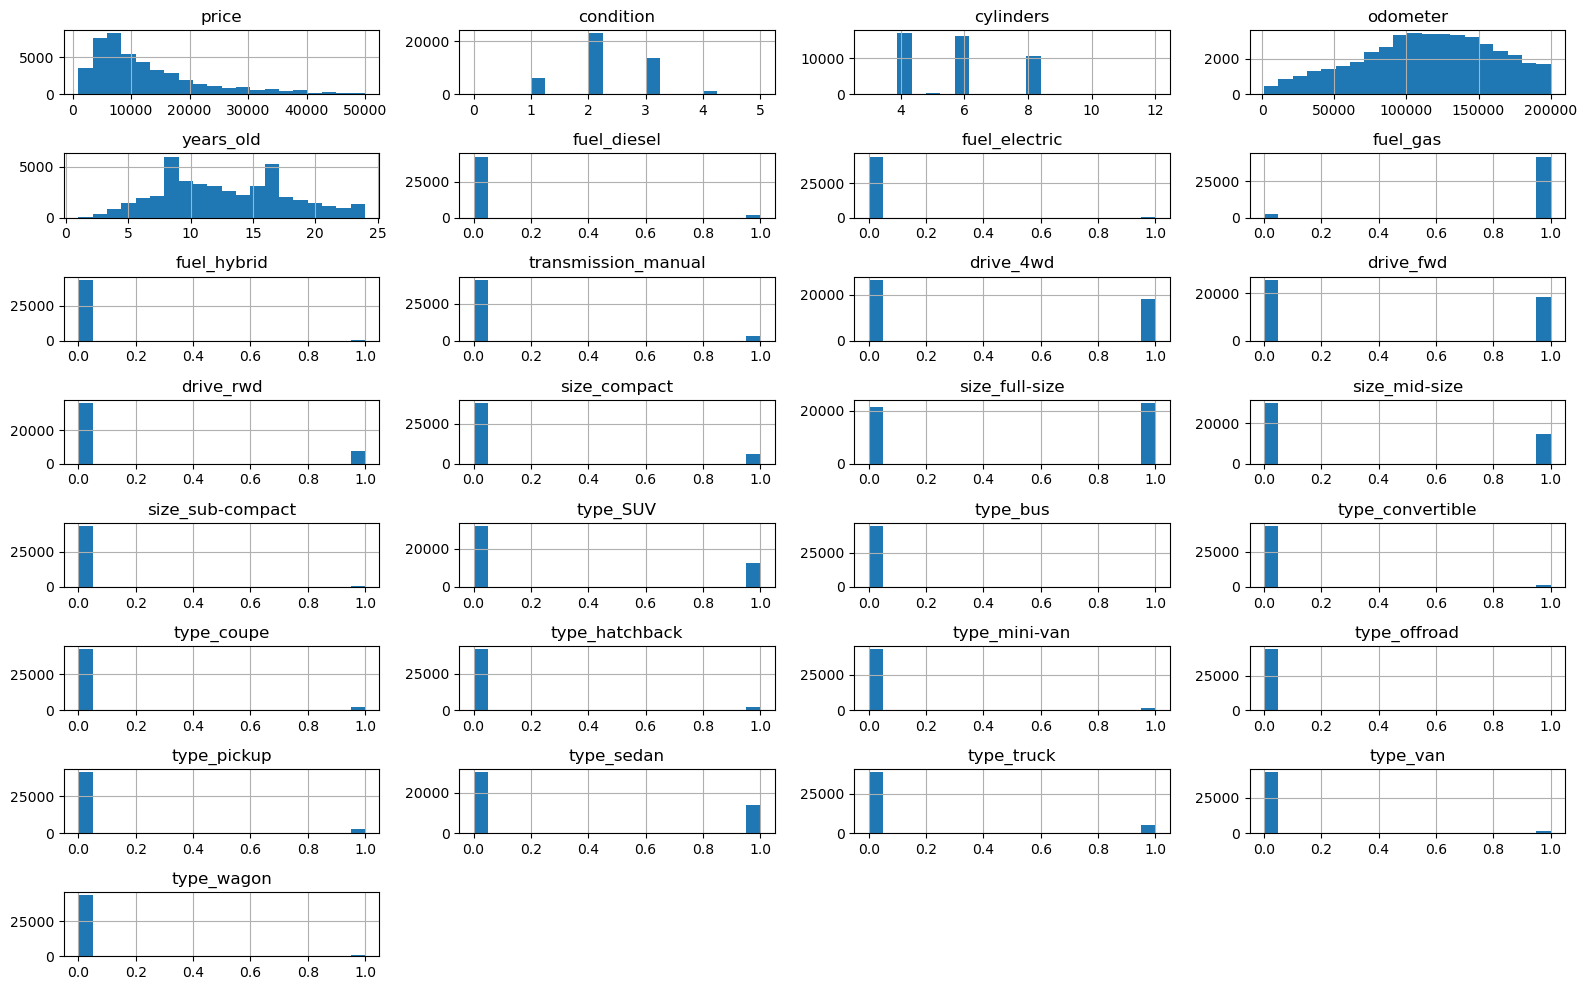

In [28]:
sales.hist(figsize = (16,10), layout=(8, 4), bins=20)
plt.tight_layout()

Text(0.5, 0, 'Price')

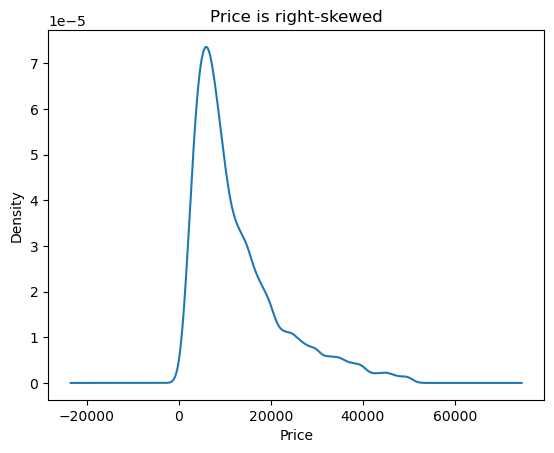

In [29]:
sales['price'].plot(kind = 'kde', title = "Price is right-skewed");
plt.xlabel('Price')

Text(0.5, 0, 'Years Old')

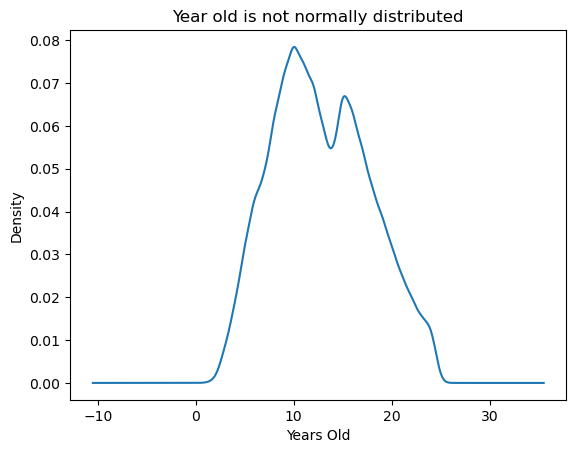

In [30]:
sales['years_old'].plot(kind = 'kde', title = "Year old is not normally distributed");
plt.xlabel('Years Old')

Text(0.5, 0, 'Odometer')

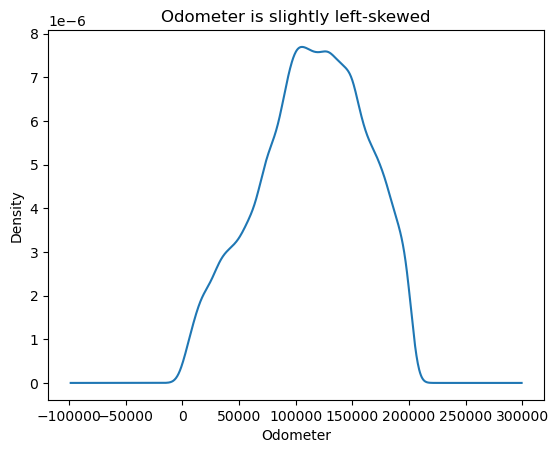

In [31]:
sales['odometer'].plot(kind = 'kde', title = "Odometer is slightly left-skewed");
plt.xlabel('Odometer')

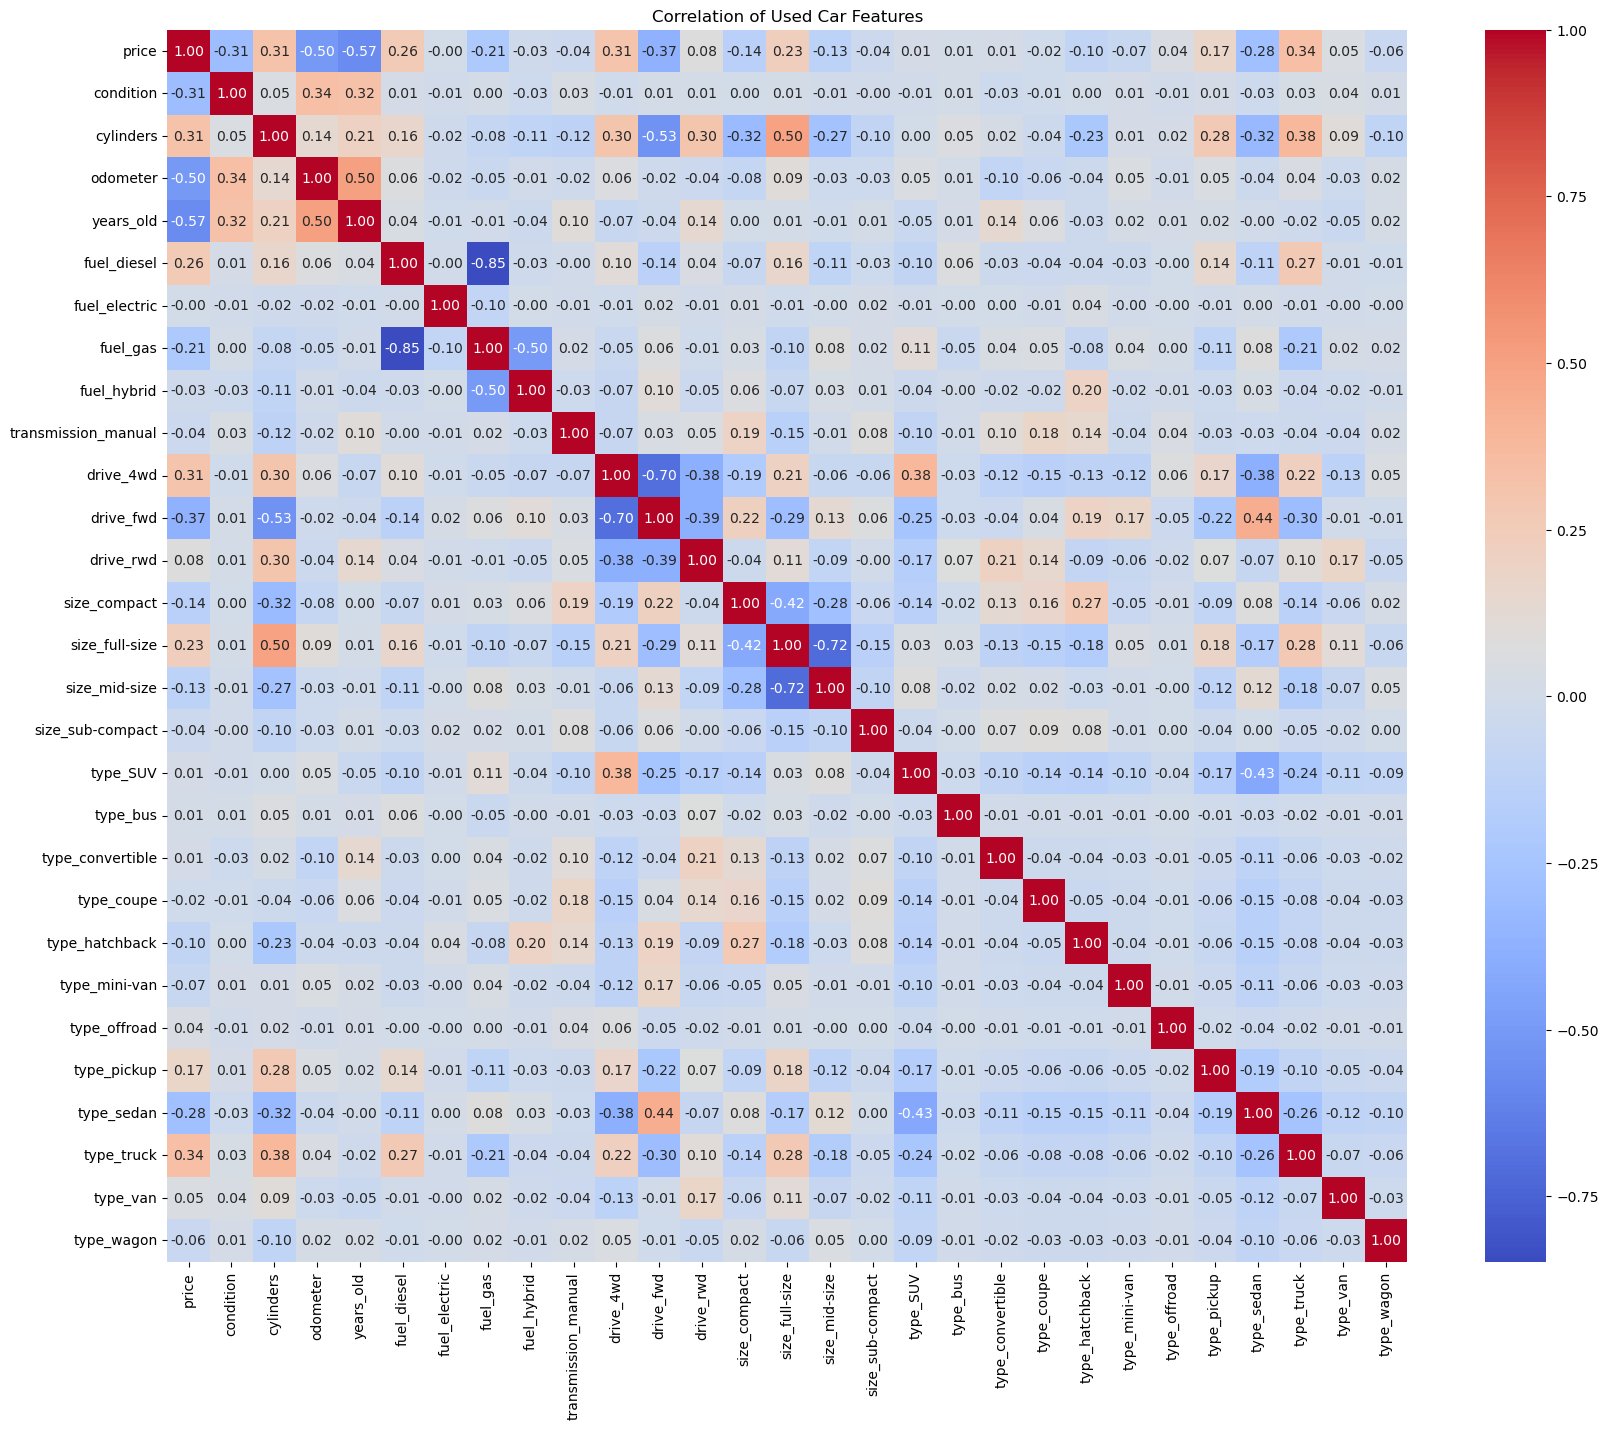

In [32]:
# Correlation heatmap of non-categorical columns
plt.figure(figsize=(20, 16))
sns.heatmap(sales.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Used Car Features')
plt.show()

## Correlation summary
* Some features have very weak correlation with price, e.g. hybrid, manual transmission, and car types, bus and convertible
* Age (years_old), mileage (odometer), front-wheel and back-wheel drive have the strongest correlation with price
* Some features are strongly correlated with each other:
  *  Age (years_old) and mileage (odometer)
  *  Number of cylinders and car size full
  *  Fuel type gas and diesel 


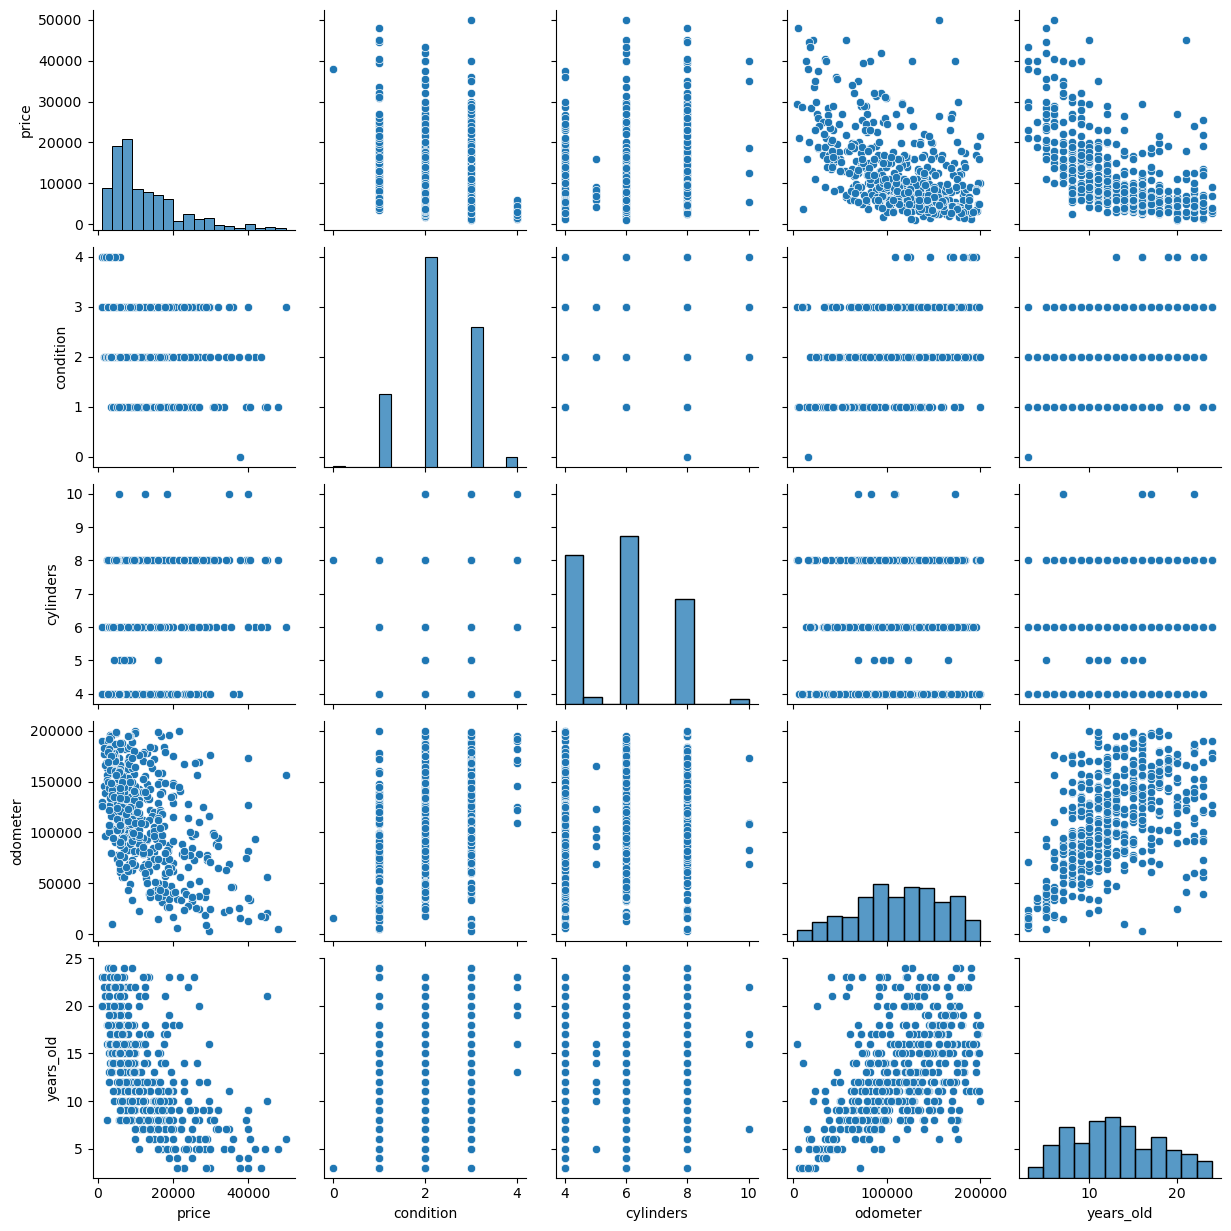

In [33]:
# sales
numeric_features = ['price', 'condition', 'cylinders', 'odometer', 'years_old']
sns.pairplot(sales.sample(n=500, random_state=42)[numeric_features])

## Distribution and correlation notes
* Prices have right-skewed distribution
* Odometer (mileage) looks like a normal distribution
* Years-old (age) does not exhibit normal distribution
* Price and years-old correlation has a logarithmic shap
* Odometer (mileage) and years-old (age) has weak linear correlation, as expected.  Older cars tend to have higher mileage
* Condition and cylinders are discreet and exhibits wealk correlation with price



## Feature selection


In [34]:
# Dataframe with only feature columns
numeric_features_df = sales[['condition', 'cylinders', 'odometer', 'years_old']]
numeric_features_df

condition  cylinders  odometer  years_old
0            2.0          6  128000.0       10.0
1            3.0          8   88000.0       19.0
2            2.0          6   95000.0       11.0
3            3.0          8  144700.0       22.0
4            3.0          6  176144.0       19.0
...          ...        ...       ...        ...
44433        4.0          8  195000.0       23.0
44434        3.0          4   90000.0       10.0
44435        3.0          4  185000.0       18.0
44436        1.0          8  110000.0        9.0
44437        3.0          8  200000.0       17.0

[44438 rows x 4 columns]

Components:	 1 =	 [53.60797272] 	Cumulative Variance
Components:	 2 =	 [73.30562274] 	Cumulative Variance
Components:	 3 =	 [88.83757075] 	Cumulative Variance
Components:	 4 =	 [100.] 	Cumulative Variance


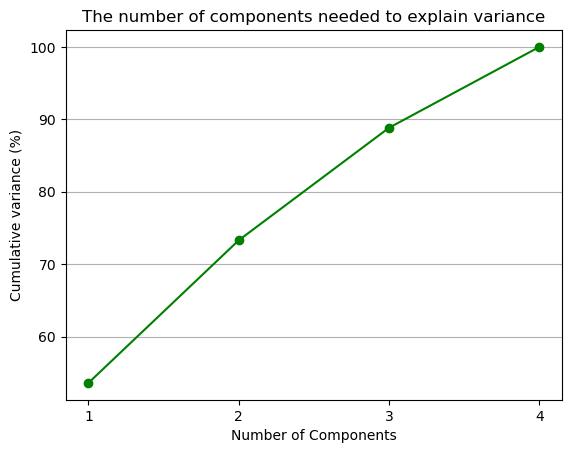

In [35]:
# Scale and perform PCA
def get_variance(X, n):
    scaler = MinMaxScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))

    return pca.explained_variance_ratio_.cumsum()[-1:]

# Run PCA for the number of features we have
vars = []
for i in range(1,5):
    v =  get_variance(numeric_features_df, i)*100
    vars.append(v)
    print('Components:\t', i, '=\t', v, 
          '\tCumulative Variance')

# Plot result
xi = np.arange(1, 5, step=1)

plt.plot(xi, vars, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 5, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.grid(axis='y')

## PCA shows at least 3 components to get 87% variance.  
All 4 features should be used since reducing to 3 components is not reaching 90%.  Since we have only a few numeric features, it's not meaningful to use PCA for modeling.


## Feature selection
Looking at correlation matrix and permutation importance, we can drop features that are not important to the model

In [36]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y = sales['price']
X = sales.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
X_train.describe()

condition     cylinders       odometer     years_old   fuel_diesel  \
count  35550.000000  35550.000000   35550.000000  35550.000000  35550.000000   
mean       2.217947      5.722391  114278.596709     12.807764      0.041632   
std        0.732026      1.590317   46983.759517      4.937786      0.199748   
min        0.000000      3.000000    1000.000000      1.000000      0.000000   
25%        2.000000      4.000000   81992.500000      9.000000      0.000000   
50%        2.000000      6.000000  116530.000000     12.000000      0.000000   
75%        3.000000      6.000000  150000.000000     16.000000      0.000000   
max        5.000000     12.000000  200000.000000     24.000000      1.000000   

       fuel_electric      fuel_gas   fuel_hybrid  transmission_manual  \
count   35550.000000  35550.000000  35550.000000         35550.000000   
mean        0.000563      0.942925      0.014880             0.064557   
std         0.023713      0.231988      0.121076             0.245746   
min         0.000000      0.000000      0.000000             0.000000   
25%         0.000000      1.000000      0.000000             0.000000   
50%         0.000000      1.000000      0.000000             0.000000   
75%         0.000000      1.000000      0.000000             0.000000   
max         1.000000      1.000000      1.000000             1.000000   

          drive_4wd  ...  type_convertible    type_coupe  type_hatchback  \
count  35550.000000  ...      35550.000000  35550.000000    35550.000000   
mean       0.406273  ...          0.026864      0.046470        0.047314   
std        0.491144  ...          0.161687      0.210503        0.212312   
min        0.000000  ...          0.000000      0.000000        0.000000   
25%        0.000000  ...          0.000000      0.000000        0.000000   
50%        0.000000  ...          0.000000      0.000000        0.000000   
75%        1.000000  ...          0.000000      0.000000        0.000000   
max        1.000000  ...          1.000000      1.000000        1.000000   

       type_mini-van  type_offroad   type_pickup    type_sedan    type_truck  \
count   35550.000000  35550.000000  35550.000000  35550.000000  35550.000000   
mean        0.027314      0.003404      0.071167      0.319409      0.123066   
std         0.162998      0.058242      0.257108      0.466254      0.328518   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      1.000000      0.000000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

           type_van    type_wagon  
count  35550.000000  35550.000000  
mean       0.029226      0.022504  
std        0.168443      0.148316  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 28 columns]

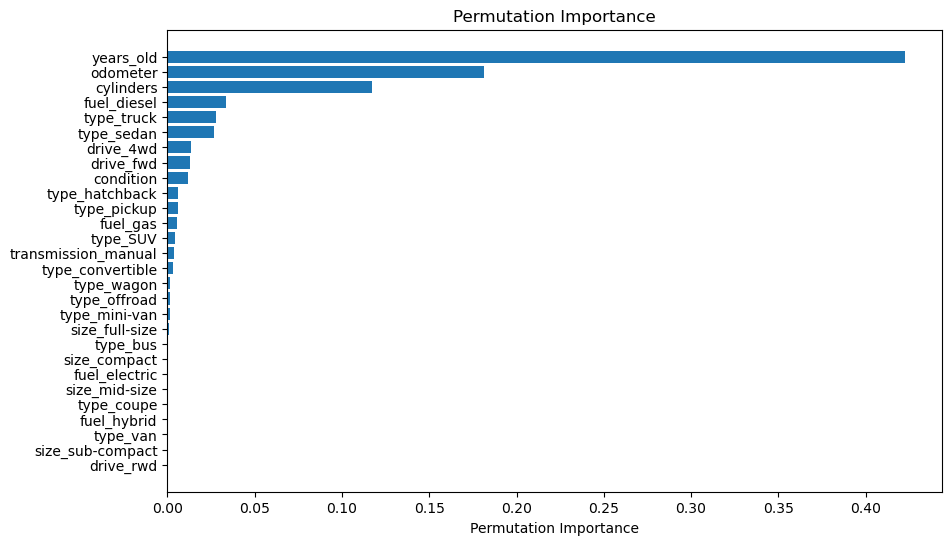

In [38]:

model = LinearRegression()
model.fit(X_train, y_train)
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=0)

# Get feature importances and their indices
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance')
plt.show()

In [39]:
columns_to_drop = ['type_van', 'drive_rwd', 'size_sub-compact', 'fuel_electric',
       'size_mid-size', 'type_coupe', 'size_compact', 'type_bus',
       'fuel_hybrid', 'type_mini-van', 'size_full-size', 'type_offroad',
       'type_wagon', 'transmission_manual', 'type_convertible', 'type_pickup',
       'type_SUV', 'type_hatchback']
X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35550 entries, 11096 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   condition    35550 non-null  float64
 1   cylinders    35550 non-null  int64  
 2   odometer     35550 non-null  float64
 3   years_old    35550 non-null  float64
 4   fuel_diesel  35550 non-null  float64
 5   fuel_gas     35550 non-null  float64
 6   drive_4wd    35550 non-null  float64
 7   drive_fwd    35550 non-null  float64
 8   type_sedan   35550 non-null  float64
 9   type_truck   35550 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.0 MB


### Scale data
Use MinMaxScaler since pairplot graph shows that features are not normally distributed

In [41]:
# intiate the MinMax Scaler
scale = MinMaxScaler()

# fit transform on the train data 
X_train[:] = scale.fit_transform(X_train[:])

# Test data
X_test[:] = scale.transform(X_test[:])

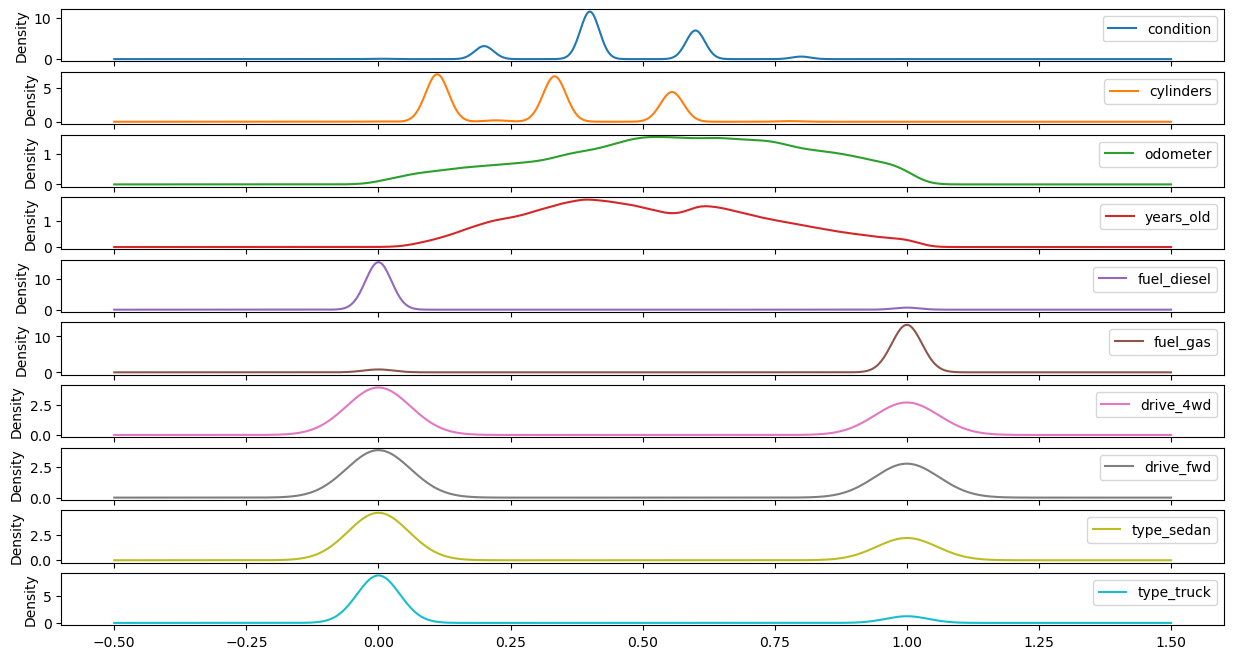

In [42]:
X_train.plot(kind = 'kde', subplots = True,figsize = (15,8));

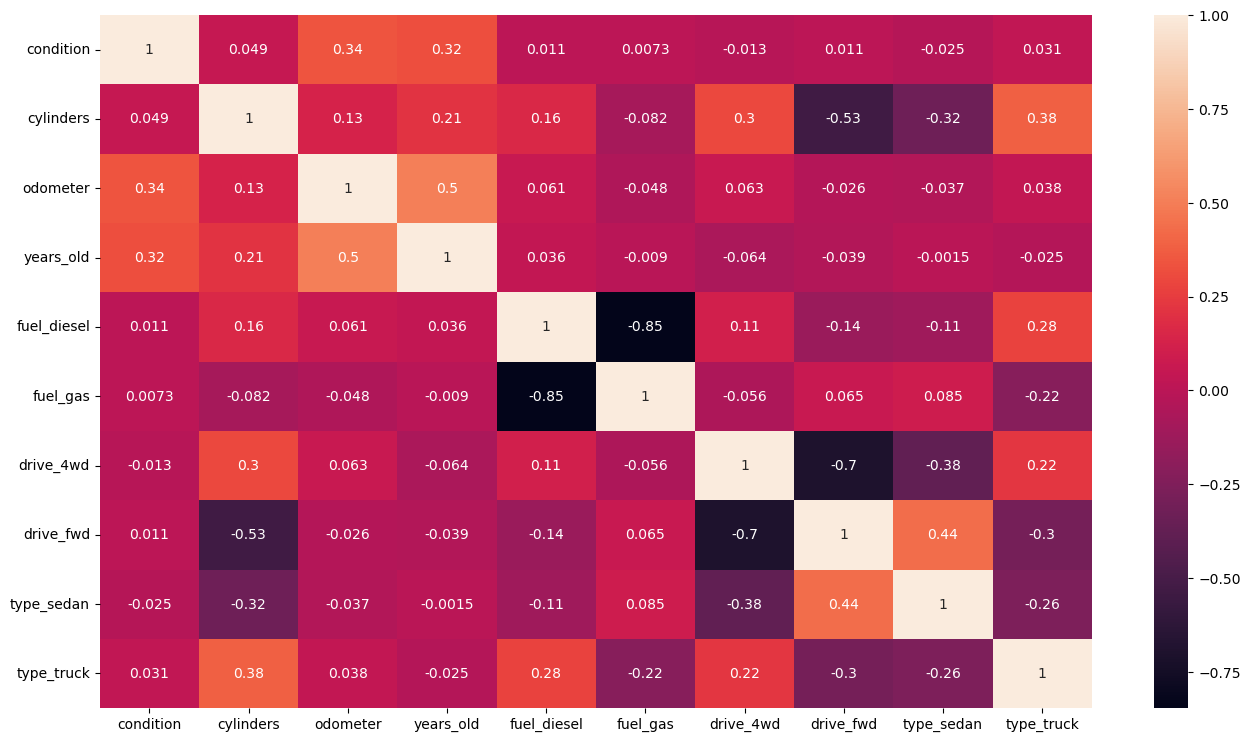

In [43]:
corr = X_train.corr()
plt.rcParams["figure.figsize"] = (16,9)
sns.heatmap(corr, annot = True);
plt.show()

### Drop fuel_diesel and drive_4wd since there is strong correlation with fuel_gas and drive_fwd, respectively

In [44]:
X_train = X_train.drop(columns=['fuel_diesel', 'drive_4wd'], axis=1)
X_test = X_test.drop(columns=['fuel_diesel', 'drive_4wd'], axis=1)

Text(0.5, 1.0, 'Scatter Plot of Odometer vs Price with Linear and Log Regression Lines')

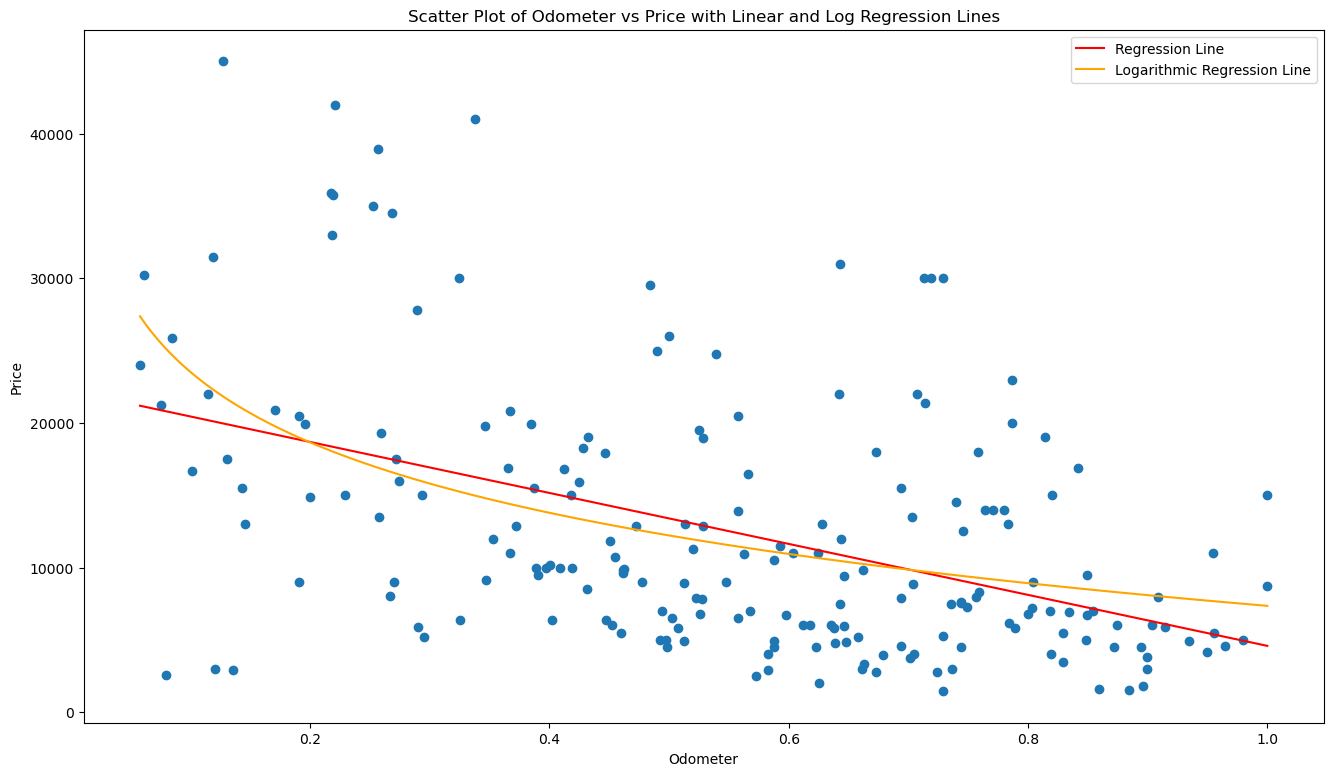

In [45]:
x_sample = X_train.sample(n=200, random_state=42)['odometer']
y_sample = y_train.sample(n=200, random_state=42)
plt.scatter(x_sample, y_sample)

# Linear regression
coefficients = np.polyfit(x_sample, y_sample, 1)
poly = np.poly1d(coefficients)

# Generate points for the regression line
x_reg = np.linspace(min(x_sample), max(x_sample), 100)
y_reg = poly(x_reg)

# Plot the regression line
plt.plot(x_reg, y_reg, color='red', label='Regression Line')

# Log regression
x_log = np.log(x_sample)

# Fit a linear regression model to the transformed data
coefficients = np.polyfit(x_log, y_sample, 1)
poly = np.poly1d(coefficients)

# Generate points for the regression line
x_reg = np.linspace(min(x_log), max(x_log), 100)
y_reg = poly(x_reg)

# Plot the regression line
plt.plot(np.exp(x_reg), y_reg, color='orange', label='Logarithmic Regression Line')

# Chart title and labels
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot of Odometer vs Price with Linear and Log Regression Lines')

### Odometer exhibits some signs of non-linear relation with price


### Baseline Regression Model

In [46]:
dummy = DummyRegressor()
# fit the model
dummy.fit(X_train, y_train)

# Predictions on test 
y_pred = dummy.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate rmse
rmse = mean_squared_error(y_test, y_pred, squared = False)
print("Root Mean Squared Error:", rmse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


Mean Absolute Error: 7395.137182547367
Mean Squared Error: 92928774.31659342
Root Mean Squared Error: 9639.957174002042
R^2 Score: -2.2110917931028595e-05


As expected, baseline is not a good model.

### Compare Ridge, Lasso and Linear Regression Models

In [47]:
# Fit with Ridge, Lasso and Linear models
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict models
pred_ridge_train = ridge.predict(X_train)
pred_ridge_test = ridge.predict(X_test)

pred_lasso_train = lasso.predict(X_train)
pred_lasso_test = lasso.predict(X_test)

pred_lin_train = lin.predict(X_train)
pred_lin_test = lin.predict(X_test)

Visualize results

In [49]:
y_comp = pd.DataFrame(y_train)

y_comp['ridge'] = pred_ridge_train
y_comp['lasso'] = pred_lasso_train
y_comp['linear'] = pred_lin_train

In [50]:
y_comp.head()


price         ridge         lasso        linear
11096   8570   9738.324188   9737.240866   9733.597299
38537   2300  10081.861855  10077.817242  10082.265120
554    33995  29372.720661  29355.516430  29378.017830
43993   7495   9985.773716   9975.562662   9986.745378
11257   7595  14112.869424  14111.425757  14111.424900

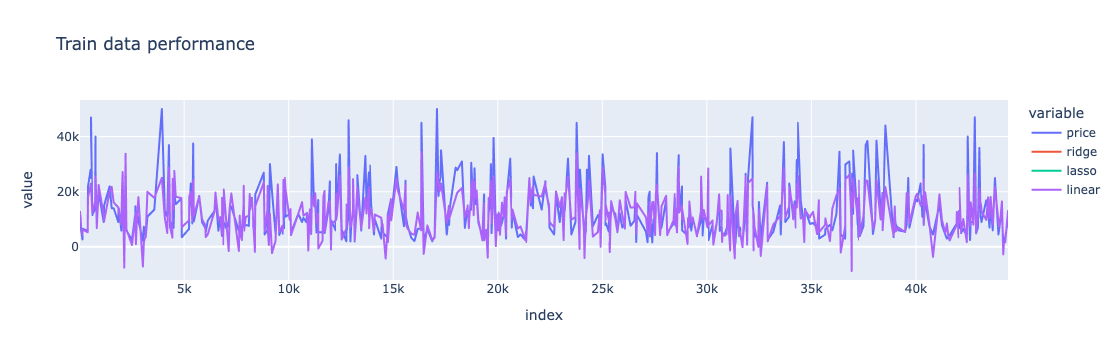

In [51]:
y_comp.sample(n=500).sort_index().plot(kind = 'line', backend = 'plotly', title = "Train data performance")

In [52]:
# Calculate error and R-squared for Ridge Model
mae = mean_absolute_error(y_test, pred_ridge_test)
mse = mean_squared_error(y_test, pred_ridge_test)
rmse = mean_squared_error(y_test, pred_ridge_test, squared = False)
r2 = r2_score(y_test, pred_ridge_test)
print("Ridge Model")
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

Ridge Model
Mean Absolute Error: 3946.72
Mean Squared Error: 28968519.43
Root Mean Squared Error: 5382.24
R^2 Score: 0.69


In [53]:
# Calculate error and R-squared for Lasso Model, pred_lin_test pred_lasso_test, pred_lin_test
mae = mean_absolute_error(y_test, pred_lasso_test)
mse = mean_squared_error(y_test, pred_lasso_test)
rmse = mean_squared_error(y_test, pred_lasso_test, squared = False)
r2 = r2_score(y_test, pred_lasso_test)
print("Lasso Model")
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

Lasso Model
Mean Absolute Error: 3946.17
Mean Squared Error: 28968009.38
Root Mean Squared Error: 5382.19
R^2 Score: 0.69


In [54]:
# Calculate error and R-squared for Linear Regression Model
mae = mean_absolute_error(y_test, pred_lin_test)
mse = mean_squared_error(y_test, pred_lin_test)
rmse = mean_squared_error(y_test, pred_lin_test, squared = False)
r2 = r2_score(y_test, pred_lin_test)
print("Linear Regression Model")
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

Linear Regression Model
Mean Absolute Error: 3947.01
Mean Squared Error: 28968351.48
Root Mean Squared Error: 5382.23
R^2 Score: 0.69


R-squared is similar for Ridge and Lasso with alpha=1 and linear regression.  Next, use GridSearchCV to see if other alpha value gets better result

In [55]:
# Set up array with Ridge alpha to evaluate
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_grid = GridSearchCV(ridge, 
                          parameters,
                          scoring='neg_mean_squared_error', 
                          cv=10, 
                          n_jobs = -1, 
                          return_train_score=True)

In [56]:
# Fit the model
ridge_grid.fit(X_train, y_train)
ridge_grid.best_params_

{'alpha': 0.01}

In [57]:

# Set up array with Ridge alpha to evaluate
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_grid = GridSearchCV(lasso, 
                          parameters,
                          scoring='neg_mean_squared_error', 
                          cv=10, 
                          n_jobs = -1, 
                          return_train_score=True)

In [58]:
# Fit the model
lasso_grid.fit(X_train, y_train)
lasso_grid.best_params_

/Users/jullylau/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.669e+11, tolerance: 2.971e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jullylau/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.637e+11, tolerance: 2.987e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jullylau/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

{'alpha': 0.01}

In [59]:
# Refit with Ridge and Lasso with optimal alpha values from GridSearchCV
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

In [60]:
# Predict models
pred_ridge_train = ridge.predict(X_train)
pred_ridge_test = ridge.predict(X_test)

pred_lasso_train = lasso.predict(X_train)
pred_lasso_test = lasso.predict(X_test)

In [61]:
# Calculate error and R-squared for Ridge Model
mae = mean_absolute_error(y_test, pred_ridge_test)
mse = mean_squared_error(y_test, pred_ridge_test)
rmse = mean_squared_error(y_test, pred_ridge_test, squared = False)
r2 = r2_score(y_test, pred_ridge_test)
print("Ridge Model")
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

Ridge Model
Mean Absolute Error: 3947.01
Mean Squared Error: 28968352.96
Root Mean Squared Error: 5382.23
R^2 Score: 0.69


In [62]:
# Calculate error and R-squared for Lasso Model
mae = mean_absolute_error(y_test, pred_lasso_test)
mse = mean_squared_error(y_test, pred_lasso_test)
rmse = mean_squared_error(y_test, pred_lasso_test, squared = False)
r2 = r2_score(y_test, pred_lasso_test)
print("Lasso Model")
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

Lasso Model
Mean Absolute Error: 3947.01
Mean Squared Error: 28968347.12
Root Mean Squared Error: 5382.23
R^2 Score: 0.69


### Tuned Ridge and Lasso alpha yields no improvement in model

In [63]:
ridge.coef_

array([ -5036.16175403,  14978.74816329, -12440.96389147, -20409.78027348,
        -6645.63686868,  -3181.75841913,  -1837.63694338,   3962.30913906])

In [64]:
lasso.coef_

array([ -5035.79317286,  14978.55789725, -12440.89694747, -20409.77457576,
        -6645.50658913,  -3181.77592937,  -1837.61547485,   3962.27880373])

Coefficient
condition       -5036.2
cylinders       14978.7
odometer       -12441.0
years_old      -20409.8
fuel_gas        -6645.6
drive_fwd       -3181.8
type_sedan      -1837.6
type_truck       3962.3

Text(0.5, 1.0, 'Make year, mileage and number of cylinders are what consumers care about')

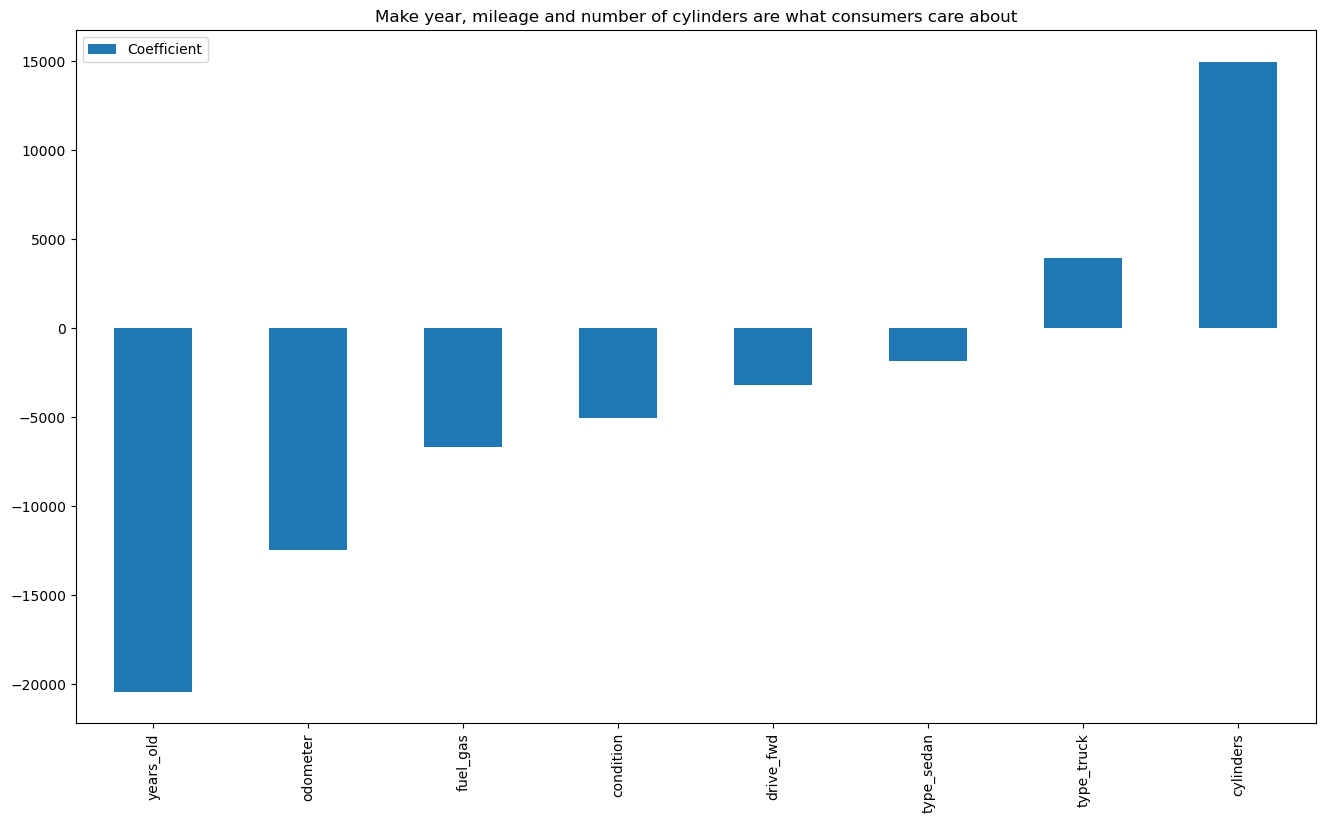

In [65]:
coeffs = pd.DataFrame(np.round(ridge.coef_,1), X_train.columns, columns = ["Coefficient"])
display(coeffs)
coeffs.sort_values(by='Coefficient').plot(kind = "bar");
plt.title('Make year, mileage and number of cylinders are what consumers care about')

## Conclusion
Ridge and Lasso models yields same performance as linear regression model.  This demonstrates a linear relations between the price and the features: years in age, mileage, number of cylinders, fuel type, condition, drive type and whether the car is a sedan or a truck.

This is not a very strong predictive model, with only 0.69 R-squared.  Although we cannot use this model to predict car prices, we can deduce from the model that the following are the most important features that consumers care about.

These features have major negative impact on price
* Age of car - This is the driving factor for car price.  The older the car is, the cheaper it would be.
* Mileage - Odometer reading of the car is the mileage and the higher the readying, the lower the price

These features have some negative impact on price
* Fuel type - Cars with gas fuel type has a negative coefficient, meaning that electric and hybrid cars are priced higher, but it is correlated with age of car, as electric and hybrid cars tend to be newer
* Condition - Condition rating is from 0 to 5 where 0 is new and 5 is savage.  The worse condition of the cars are the lower the price
* Drive type - Front-wheel drive cars are lowered price that back-wheel drive
* Sedan - Very minor impact on cars that are sedans, meaning that trucks and SUVs are higher priced

These features have negative impact on price
* Number of cylinders - Cars with more cylinders are higher priced.  This is the number 3 factor in prices
* Truck - Trucks are higher price than other car types

## Next Steps

Based on this analysis, used car dealership should value cars based on these top 3 criteria
* Year the car is manufactured
* Mileage
* Number of cylinders

For more precise price prediction, we can develop models specific to the make and model of the cars.  Car buyers usually have brand-affinity and have a specific car type in mind when purchasing a car.  Valuation specific to the brand and model can help used car dealership determine pricing of cars the dealership purchase by subtracting the desire margin from the predicted price.